# Laufzeituntersuchung

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import time

## Durchführung

Durchführung des DBscans für $ 1000\cdot 2^i,\ i \in [0,9]\cap \mathbb{N}$ zufällig erzeugte Knoten im Graphen

In [15]:
time_values=[]
for i in range(10):#10
    X, y = make_blobs(n_samples=1000*(2**(i)), centers=4,
                   random_state=42)#, cluster.std=0.7)



    #print(X.shape)
    start = time.time()
    #plt.show()
    model=KMeans(4)
    model.fit(X)
    centers = np.array(model.cluster_centers_)
    #print(clustering.labels_)
    end = time.time()
    elapsed=end-start
    time_values.append(elapsed)
time_values_normalised=[]
problemsize=[]
for i in range(10):#10
    time_values_normalised.append(time_values[i]/time_values[0])
    problemsize.append(100*(2**i))
    #plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
    #xsquar.append(2**(2*i))
print("Problemgröße:")
print(problemsize)
print("Berechnungszeiten")
print(time_values)
print("Berechnungszeiten normalisiert auf kleinste Problemgröße")
print(time_values_normalised)

Problemgröße:
[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200]
Berechnungszeiten
[0.01641559600830078, 0.0202486515045166, 0.060260772705078125, 0.030374526977539062, 0.04239773750305176, 0.0668799877166748, 0.1180117130279541, 0.22106146812438965, 0.4485900402069092, 1.2990922927856445]
Berechnungszeiten normalisiert auf kleinste Problemgröße
[1.0, 1.2335008423865683, 3.6709463777377564, 1.8503456689711264, 2.5827717422878056, 4.0741735897286935, 7.188999593330622, 13.466551443676291, 27.327063847092315, 79.13768663219659]


In [16]:
log_time_values_normalised=[]
log_time_values_normalised=np.log2(time_values_normalised)
#print(log_time_values_normalised)

## Laufzeitunterschiede mit Vergrößerung der Problemgröße

Sei $t_j$ die Laufzeit zur Problemgröße $j$. 
Wir berechnen: $\frac{t_{j+1}}{t_j}$

In [13]:
changes=[]
for i in range(9):
    changes.append(time_values[i+1]/time_values[i])
print(changes)

[2.3819653755137624, 0.6147933573161549, 1.334586402218102, 1.5462662027300884, 1.6822290087661815, 1.861905916882875, 1.9762689874417088, 3.3118780864721553, 1.3855910719505542]


## Plotten der Resultate

Text(0, 0.5, 'log_2(Ausführzeit_normalized)')

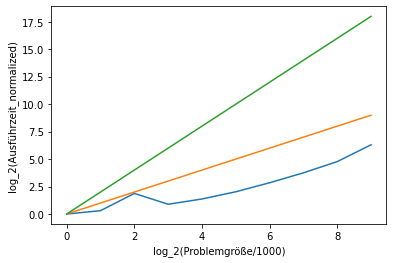

In [18]:
plt.plot(log_time_values_normalised)
plt.plot(range(10))#10
plt.plot(range(0,20,2))#0,20,2
plt.xlabel("log_2(Problemgröße/1000)")
plt.ylabel("log_2(Ausführzeit_normalized)")
#plt.axis([0, 20, 0 , 40])
#plt.plot(range(10))

## Zusammenhänge

Let assume that the Runtime $t$ increase to the Problemsize $n$ linear. ($t(n)=a*n$) If we increase the Problemsize by power to 2, then the Runtime should also increase by a power of 2. $i=2^n,\ t(i)=a*i=a*2^n$.
If we take the $\log_2$ to this function we get $\log_2(a*2^n)=\log_2(a)+\log_2(2^n)\log_a(a)+n$.

Let assume that the Runtime $t$ increase to the Problemsize $n$ quatratic. $t(n)=a*n^2$. If we increase that Problemsize by power to 2, the Runtime increase now fast. Problem $i=2^n$, $t(i)=a*i^2=a*2^2n$.
If we take now the log to this function we get: $\log_2(t(i))=\log_2(a)+\log_2(2^2n)=\log_2(a)+2n$

So if we have a linear runtime, we would get in the log log Graph a linear function($lt(x)=ax+b$) with a=1, if we have a quadratic runtim we would get a linear funciton ($lt(x)=ax+b$) with a=2

In the graph, the blue line ist our Runtime Data from DBSCAN, the organge line is a linear function with $y=x$, the green line a linear function with $y=2x$. In the beginning we got some overlap, but later, the function grows similar then $y=x$, so i would assume a linear Runtime.